# A Project on VARMA Model

#### Importing the required libraries

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX

#### Reading the data

In [271]:
#reading first dataframe
df=pd.read_csv("M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.index.freq='MS'
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [272]:
#reading second datafrane
sp=pd.read_csv("C:\\Users\\AKASH pc\\Downloads\\Python for Time Series Data Analysis\\Data\\PCEPersonalSpending.csv",index_col=0,parse_dates=True)
sp.index.freq='MS'
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


#### Joining both dataframe to form one dataframe

In [273]:
#concating a new dataframe
data=pd.concat([df,sp],axis=1)
data.shape
data.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [274]:
#dropping null values
data=data.dropna()


#### Just plotting the data to see the trend

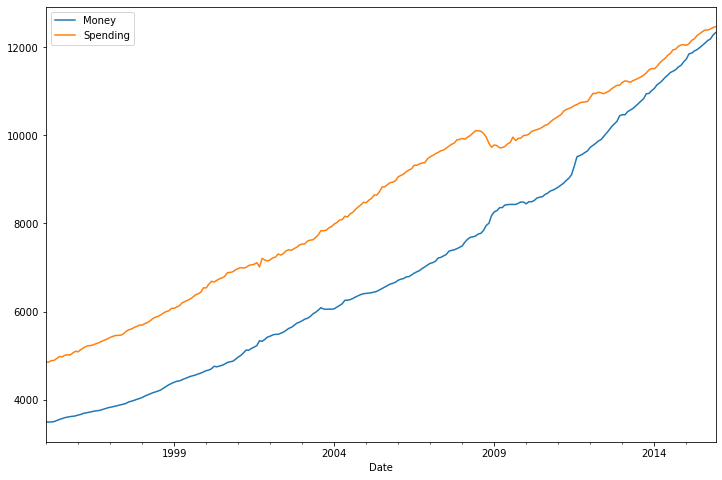

In [275]:
#plotting the data
data.plot(figsize=(12,8))

#### Obtaining the order of VARMA model through auto_arima function

In [284]:
auto_arima(data['Money'])

ARIMA(order=(1, 2, 2), scoring_args={}, with_intercept=False)

In [283]:
auto_arima(data['Spending'])

ARIMA(order=(1, 1, 2), scoring_args={})

The order of p and q are (1,2)

#### Performing adfuller test to check the stationarity of both the columns

In [285]:
adfuller(data['Money'])

(4.239022425670641,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [286]:
adfuller(data['Spending'])

(0.14979608598625258,
 0.9693009944428311,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

data is not satisfied so we do the differencing till the data become stationary

In [287]:
data1=data.diff()
print(adfuller(data1['Spending'][1:]))
adfuller(data1['Money'][1:])

(-7.226973930850648, 2.0410272592129706e-10, 2, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 2328.23145843905)


(-2.0574040497379387,
 0.26198379785112474,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.948346069441)

We will again difference

In [288]:
data2=data1.diff().dropna()
print(adfuller(data2['Money']))
adfuller(data2['Spending'])

(-7.077470794342999, 4.760674931296582e-10, 14, 235, {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}, 2217.097202826827)


(-8.760145426337711,
 2.6878999679872806e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 2339.3283710766104)

now we are satisfied that our data is stationary 

#### Train-Test Split

In [289]:
nobs=12
train=data2.iloc[:-nobs]
test=data2.iloc[-nobs:]

#### Model fitting on training set

In [290]:
#fitting on range of number to know the order of VAR model
model=VARMAX(train,order=(1,2),trend='c')
result=model.fit()
result.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2291.824
,+ intercept,AIC,4617.648
Date:,"Mon, 16 Nov 2020",BIC,4676.677
Time:,22:58:53,HQIC,4641.438
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"71.05, 30.34",Jarque-Bera (JB):,"645.02, 134.64"
Prob(Q):,"0.00, 0.87",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"6.26, 2.56",Skew:,"1.40, -0.29"


#### Forecasting the result of the model

In [291]:
forecasted_df=result.forecast(12)
forecasted_df

,Money,Spending
2015-01-01,-18.479354,37.568815
2015-02-01,-10.837259,-8.339755
2015-03-01,4.217030,3.699753
2015-04-01,-1.497380,-0.969060
2015-05-01,0.653423,0.859884
2015-06-01,-0.142812,0.130335
2015-07-01,0.142230,0.430547
2015-08-01,0.047427,0.300653
2015-09-01,0.073388,0.361109
2015-10-01,0.070892,0.330263


#### Reverting the data into the original form

In [292]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_df['Money_1d'] = (data['Money'].iloc[-nobs-1]-data['Money'].iloc[-nobs-2]) + forecasted_df['Money'].cumsum()

# Now build the forecast values from the first difference set
forecasted_df['MoneyForecast'] = data['Money'].iloc[-nobs-1] + forecasted_df['Money_1d'].cumsum()

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_df['Spending_1d'] = (data['Spending'].iloc[-nobs-1]-data['Spending'].iloc[-nobs-2]) + forecasted_df['Spending'].cumsum()

# Now build the forecast values from the first difference set
forecasted_df['SpendingForecast'] = data['Spending'].iloc[-nobs-1] + forecasted_df['Spending_1d'].cumsum()

In [293]:
forecasted_df


,Money,Spending,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-18.479354,37.568815,60.120646,11730.220646,48.168815,12110.168815
2015-02-01,-10.837259,-8.339755,49.283387,11779.504034,39.829061,12149.997876
2015-03-01,4.217030,3.699753,53.500418,11833.004451,43.528814,12193.526689
2015-04-01,-1.497380,-0.969060,52.003037,11885.007488,42.559753,12236.086442
2015-05-01,0.653423,0.859884,52.656461,11937.663949,43.419637,12279.506080
2015-06-01,-0.142812,0.130335,52.513649,11990.177598,43.549972,12323.056051
2015-07-01,0.142230,0.430547,52.655879,12042.833477,43.980519,12367.036570
2015-08-01,0.047427,0.300653,52.703306,12095.536783,44.281172,12411.317742
2015-09-01,0.073388,0.361109,52.776694,12148.313478,44.642281,12455.960024
2015-10-01,0.070892,0.330263,52.847587,12201.161064,44.972544,12500.932568


In [294]:
#obtaining the original test data without being differenced
test_range=data[-12:]
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


#### Plotting the test and forecasted Money Data

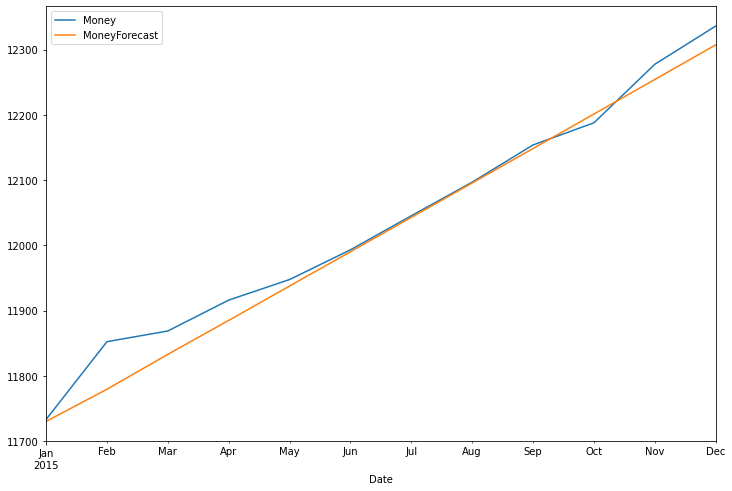

In [295]:
test_range['Money'].plot(figsize=(12,8),legend=True)
forecasted_df['MoneyForecast'].plot(legend=True)

#### Plotting the test and forecasted Spending Data

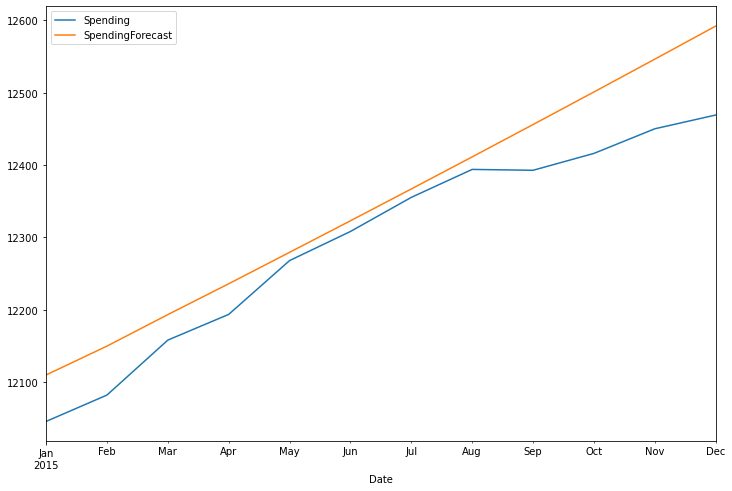

In [296]:
test_range['Spending'].plot(figsize=(12,8),legend=True)
forecasted_df['SpendingForecast'].plot(legend=True)

#### Evaluating the model

In [268]:
#for spending 
np.sqrt(mean_squared_error(test_range['Spending'],forecasted_df['SpendingForecast']))

63.253909342589075

In [213]:
test_range['Spending'].mean()

12294.533333333333

In [269]:
#for money
np.sqrt(mean_squared_error(test_range['Money'],forecasted_df['MoneyForecast']))

27.797982217060557

In [214]:
test_range['Money'].mean()

12034.008333333333

Thank you